In [ ]:
from google.colab import files
data_to_load = files.upload()


Saving Heart_attack.csv to Heart_attack (1).csv


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
df = pd.read_csv('Heart_attack.csv',)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info() #to check the data ttype and no. of observation and to find out the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


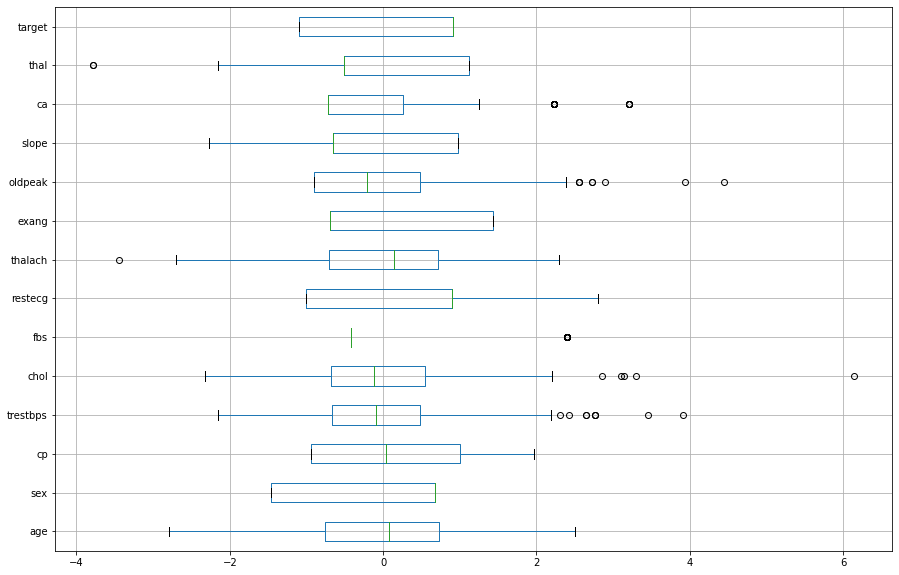

In [ ]:
#check outlier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)
z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(15,10))


In [ ]:
x=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=5)


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_test.shape)
print(y_test.shape)

(91, 13)
(91,)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [67]:
# Initialising the ANN
classifer=Sequential()

#adding the input and first hidden layer
classifer.add(Dense(output_dim=7,init='uniform',activation='relu',input_dim=13))
# Adding dropout to prevent overfitting
classifer.add(Dropout(p=0.3))
#adding the input and Second hidden layer
classifer.add(Dense(output_dim=4,init='uniform',activation='relu'))
# Adding dropout to prevent overfitting
classifer.add(Dropout(p=0.3))
#adding the output layer
classifer.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


In [68]:
# Compiling the ANN
classifer.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
# Fitting the ANN to the Training set
classifer.fit(x_train,y_train, batch_size=100,nb_epoch=300)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/300
212/212 [==============================] - 0s 805us/step - loss: 0.6931 - accuracy: 0.5613
Epoch 2/300
212/212 [==============================] - 0s 37us/step - loss: 0.6930 - accuracy: 0.5519
Epoch 3/300
212/212 [==============================] - 0s 43us/step - loss: 0.6930 - accuracy: 0.5519
Epoch 4/300
212/212 [==============================] - 0s 39us/step - loss: 0.6929 - accuracy: 0.5519
Epoch 5/300
212/212 [==============================] - 0s 48us/step - loss: 0.6929 - accuracy: 0.5519
Epoch 6/300
212/212 [==============================] - 0s 46us/step - loss: 0.6927 - accuracy: 0.5519
Epoch 7/300
212/212 [==============================] - 0s 61us/step - loss: 0.6926 - accuracy: 0.5519
Epoch 8/300
212/212 [==============================] - 0s 54us/step - loss: 0.6925 - accuracy: 0.5519
Epoch 9/300
212/212 [==============================] - 0s 41us/step - loss: 0.6924 - accuracy: 0.5519
Epoch 10/300
212/212 [==============================] - 0s 51us/step - loss: 0.69

In [70]:
#predicting the test result
y_pred=classifer.predict(x_test)
y_pred=(y_pred>0.5)


In [71]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[40,  3],
       [ 5, 43]])

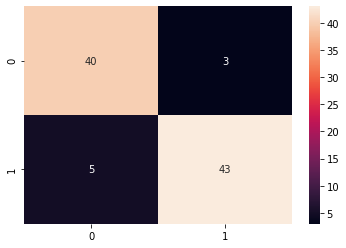

In [72]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [73]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
print("Accuracy:",a*100)

Accuracy: 91.20879120879121


In [74]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.93      0.90      0.91        48

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



In [79]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
def built_classifier():
  classifier=Sequential()

  
  classifier.add(Dense(output_dim=7,init='uniform',activation='relu',input_dim=13))
  
  # Adding dropout to prevent overfitting
  classifier.add(Dropout(p=0.3))
  classifier.add(Dense(output_dim=4,init='uniform',activation='relu'))
  classifier.add(Dropout(p=0.3))
  classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
  classifier.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
  
  return classifier

classifier=KerasClassifier(build_fn=built_classifier,batch_size=100,epochs=500)
accuracies=cross_val_score(estimator = classifier, X = x_train, y = y_train ,cv=10,n_jobs=-1)

In [80]:

accuracies

array([0.72727275, 0.77272725, 0.5714286 , 0.90476191, 0.76190478,
       0.71428573, 0.90476191, 0.85714287, 0.85714287, 0.76190478])

In [81]:
mean=accuracies.mean()
mean

0.7833333432674408